# Shallow Network in Keras

## 5.1 Software dependencies for shallow net in Keras

In [2]:
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

## 5.2 Loading MNIST data

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train.shape
y_train.shape
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

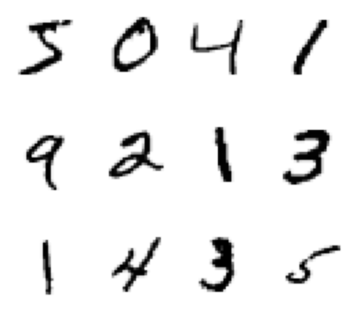

In [4]:
plt.figure(figsize =(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap = 'Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

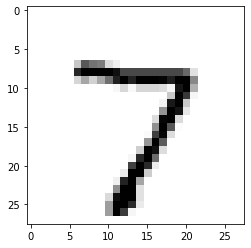

In [5]:
(X_valid.shape, y_valid.shape)
plt.imshow(X_valid[0], cmap='Greys')

## 5.3 flattening two-dimensional images to one dimension

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32') #converts the pixel darknesses from int to float
X_valid = X_valid.reshape(10000, 784).astype('float32')

## 5.4 Converting pixel integers to floats

In [7]:
X_train / 255 #so we range from 0 to 1
X_valid / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 5.5 converting integer labels to one-hot encoding

In [8]:
n_classes = 10 
y_train = tensorflow.keras.utils.to_categorical(y_train, n_classes)  
y_valid = tensorflow.keras.utils.to_categorical(y_valid, n_classes)

First we set the number of classes, 10, one for every digit. Then we transform the labels from ints into one-hot. 

In [9]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Here we see what the label for Seven is now. As can be seen, the 1 is in the 8th index of the array (because arrays start at 0 in python). 
## Keras code to architect a shallow neural network

In [12]:
model = Sequential() 
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) 
model.add(Dense(10, activation='softmax')) 

First line, we instantiate the simplest neural network object, the Sequential, and name it *model*. The Sequential neural network object is so named because each layer of the network passes info only to the next layer in the *Sequence* of layers.  
In the Second line, we specify the attributes of the hidden layers. In this example, we have 64 sigmoid-type artificial neurons. These neurons are in a general purpose, fully connected arrangement that is defined by the *Dense()* method. We also define the shape of the input layer, a one-dimensional array of length 784. 
Finally, we add the output layer. We've specified 10 softmax artifical neurons. These neurons correspond to the 10 probabilities (one for each number) that the network will output when fed a given handwritten image. 


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


So here's our layers. Input layer has 50,240 parameters, because we have 64 neurons and the shape of the input is an array with length 784. 

In [15]:
(64*784)

50176

(This wasn't in chapter 5, cuz cart before horse and all, but it's important to do this so that it trains)

In [16]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# Training a Deep Learning Model
## 5.7 Keras code to train our shallow neural network

In [18]:
model.fit(X_train, y_train, 
         batch_size=128, epochs=200,
         verbose=1,
         validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 4s 6ms/step - loss: 0.0958 - accuracy: 0.1073 - val_loss: 0.0889 - val_accuracy: 0.2132
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.2526 - val_loss: 0.0802 - val_accuracy: 0.3456
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.3589 - val_loss: 0.0743 - val_accuracy: 0.4178
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.4273 - val_loss: 0.0696 - val_accuracy: 0.4739
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.4803 - val_loss: 0.0653 - val_accuracy: 0.5214
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0647 - accuracy: 0.5220 - val_loss: 0.0615 - val_accuracy: 0.5649
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0611 - accuracy: 0.5650 - val_loss: 0.0582 - val_accuracy: 0.6049

Epoch 58/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.8962 - val_loss: 0.0190 - val_accuracy: 0.8911
Epoch 59/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.8980 - val_loss: 0.0189 - val_accuracy: 0.8914
Epoch 60/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.8987 - val_loss: 0.0188 - val_accuracy: 0.8907
Epoch 61/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.8992 - val_loss: 0.0187 - val_accuracy: 0.8918
Epoch 62/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.8998 - val_loss: 0.0186 - val_accuracy: 0.8915
Epoch 63/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9012 - val_loss: 0.0185 - val_accuracy: 0.8919
Epoch 64/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 0.8993 - val_loss: 0.0184 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9156 - val_loss: 0.0159 - val_accuracy: 0.9027
Epoch 116/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9163 - val_loss: 0.0159 - val_accuracy: 0.9023
Epoch 117/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0144 - accuracy: 0.9159 - val_loss: 0.0158 - val_accuracy: 0.9025
Epoch 118/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9176 - val_loss: 0.0158 - val_accuracy: 0.9023
Epoch 119/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0144 - accuracy: 0.9160 - val_loss: 0.0158 - val_accuracy: 0.9029
Epoch 120/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0142 - accuracy: 0.9175 - val_loss: 0.0158 - val_accuracy: 0.9025
Epoch 121/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9161 - val_loss: 0.0157 - val_ac

469/469 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9241 - val_loss: 0.0148 - val_accuracy: 0.9056
Epoch 172/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0131 - accuracy: 0.9220 - val_loss: 0.0148 - val_accuracy: 0.9059
Epoch 173/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9249 - val_loss: 0.0148 - val_accuracy: 0.9054
Epoch 174/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0126 - accuracy: 0.9263 - val_loss: 0.0148 - val_accuracy: 0.9062
Epoch 175/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0126 - accuracy: 0.9250 - val_loss: 0.0148 - val_accuracy: 0.9061
Epoch 176/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9257 - val_loss: 0.0147 - val_accuracy: 0.9064
Epoch 177/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0127 - accuracy: 0.9248 - val_loss: 0.0147 - val_accuracy: 0.9062

sure takes a while...
So the critical aspects are:
1. The fit() method of our model object enables us to train our artifical neural network with the training images of X_train as inputs and their associated labels y_train as the desired outputs
2. As the network trains, the fit() method also provides us with the option to evaluate the performance of our network by passing our validation data X_valid and y_valid into the validation data argument. 
3. With machine learning, and especially with deep learning, it is commonplace to train our model on the same data multiple times. One pass through all of our training data (60k images in the current case) is called one *epoch* of training. By setting the epochs parameter to 200, we cycle through the 60k images 200 separate times.
4. By setting verbose to 1, the model.fit() method will provide us with plenty of feedback as we train. At the moment, we'll focus on focus on the val_acc statistic that is output following each epoch of training. Validation accuracy is the proportion of the 10k handwritten images in X_valid in which the network's highest probability in the output layer corresponds to the correct digit as per the labels in y_valid. 
Our first epoch we've got an accuracy of 10.73%, by the last we've got 92.69% 

In [19]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9079


[0.014418989419937134, 0.9078999757766724]

90.79% accuracy of our model. 

In [21]:
valid_0 = X_valid[0].reshape(1, 784)
model.predict(valid_0)

array([[6.0824037e-04, 5.1517430e-04, 5.9387489e-04, 3.0440760e-03,
        8.3483278e-04, 1.6479786e-03, 1.8237320e-04, 9.8534900e-01,
        8.0795638e-04, 6.4165224e-03]], dtype=float32)

In [22]:
model.predict_classes(valid_0)

C:\Users\Nik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)